<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_Optimization_Sens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Trees

In [ ]:
!pip install schemdraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 647.4 kB/s eta 0:00:00


In [ ]:
import schemdraw
from schemdraw import flow

In [ ]:
with schemdraw.Drawing() as d:
  d.config(fontsize=11)
  d += (A0 := flow.Box(w=3.7, h=2).at((0,5)).label('New Product'))
  d += (A1 := flow.Box(w=3.7, h=2).at((5,7)).label('A1: Invest in R&D'))
  d += (A2 := flow.Box(w=3.7, h=2).at((5,3)).label('A2: Terminate'))
  d += (A3 := flow.Box(w=3.7, h=2).at((10,10)).label('A3: Marketing'))
  d += (A4 := flow.Box(w=3.7, h=2).at((10,5)).label('A4: Terminate'))
  d += (A5 := flow.Box(w=3.7, h=2).at((15,13)).label('A5: Positive Economy'))
  d += (A6 := flow.Box(w=3.7, h=2).at((15,7)).label('A6: Negative Economy'))

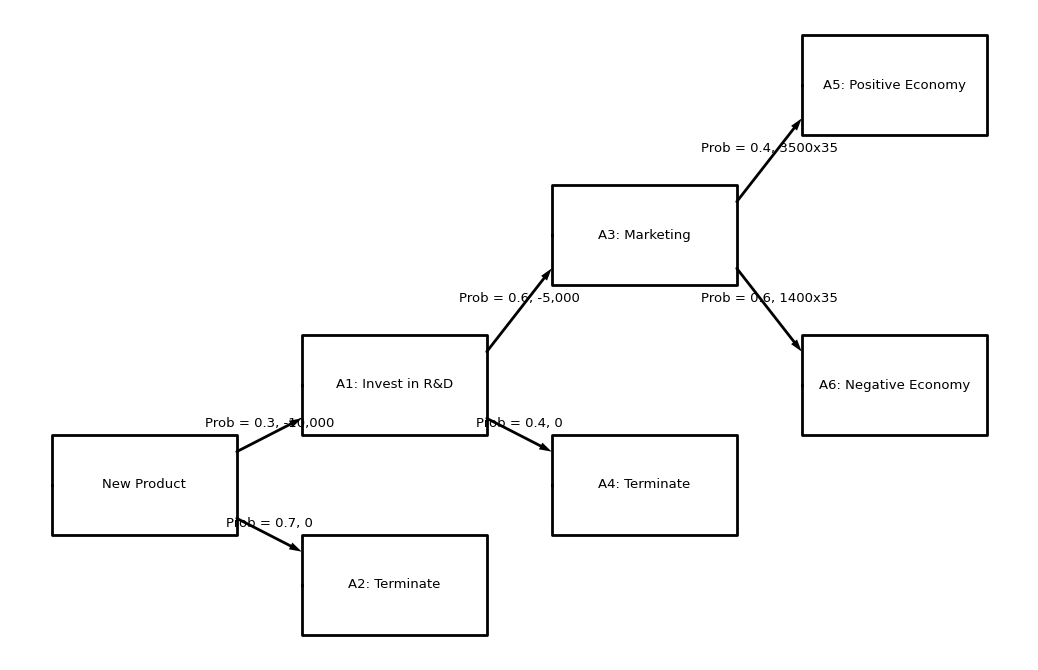

In [ ]:
with schemdraw.Drawing() as d:
  d.config(fontsize=11)
  d += (A0 := flow.Box(w=3.7, h=2).at((0,5)).label('New Product'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ENE).to(A1.WSW).label('Prob = 0.3, -10,000')
  d += (A1 := flow.Box(w=3.7, h=2).at((5,7)).label('A1: Invest in R&D'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ESE).to(A2.WNW).label('Prob = 0.7, 0')
  d += (A2 := flow.Box(w=3.7, h=2).at((5,3)).label('A2: Terminate'))

  d += flow.Wire(arrow='->', k=.3).at(A1.ENE).to(A3.WSW).label('Prob = 0.6, -5,000')
  d += (A3 := flow.Box(w=3.7, h=2).at((10,10)).label('A3: Marketing'))

  d += flow.Wire(arrow='->', k=.3).at(A1.ESE).to(A4.WNW).label('Prob = 0.4, 0')
  d += (A4 := flow.Box(w=3.7, h=2).at((10,5)).label('A4: Terminate'))

  d += flow.Wire(arrow='->', k=.3).at(A3.ENE).to(A5.WSW).label('Prob = 0.4, 3500x35')
  d += (A5 := flow.Box(w=3.7, h=2).at((15,13)).label('A5: Positive Economy'))

  d += flow.Wire(arrow='->', k=.3).at(A3.ESE).to(A6.WNW).label('Prob = 0.6, 1400x35')
  d += (A6 := flow.Box(w=3.7, h=2).at((15,7)).label('A6: Negative Economy'))

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
p=35
q_high = 3500
q_low = 1400

In [ ]:
activity = ("A1", "A2", "A3", "A4", "A5", "A6")
prob = (0.3, 0.7, 0.6, 0.4, 0.4, 0.6)
valu = (-10000, 0, -5000, 0, q_high*p, q_low*p)

In [ ]:
var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
var = var.set_index("activity")

In [ ]:
var

,prob,valu
activity,,
A1,0.3,-10000
A2,0.7,0
A3,0.6,-5000
A4,0.4,0
A5,0.4,122500
A6,0.6,49000


In [ ]:
def EMV(var_table):
    path1 = var.loc["A1", 'valu'] + var.loc["A3", 'valu'] + var.loc["A5", 'valu']
    path2 = var.loc["A1", 'valu'] + var.loc["A3", 'valu'] + var.loc["A6", 'valu']
    path3 = var.loc["A1", 'valu'] + var.loc["A4", 'valu']
    path4 = var.loc["A2", 'valu']

    prob_path1 = var.loc["A1", 'prob'] * var.loc["A3", 'prob'] * var.loc["A5", 'prob']
    prob_path2 = var.loc["A1", 'prob'] * var.loc["A3", 'prob'] * var.loc["A6", 'prob']
    prob_path3 = var.loc["A1", 'prob'] * var.loc["A4", 'prob']
    prob_path4 = var.loc["A2", 'prob']

    EMV_val = sum(np.multiply([path1, path2, path3, path4], [prob_path1, prob_path2, prob_path3, prob_path4]))

    return EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4

In [ ]:
EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4 = EMV(var)

In [ ]:
EMV_com = [EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4]

In [ ]:
EMV_com

[10212.0, 107500, 34000, -10000, 0, 0.072, 0.108, 0.12, 0.7]

## Sensitivity Analysis

In [ ]:
sens = [1, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]
p=35

In [ ]:
EMV_com = []

In [ ]:
for x in sens:
    q_high = 3500 * x
    q_low = 1400 * x

    activity = ("A1", "A2", "A3", "A4", "A5", "A6")
    prob = (0.3, 0.7, 0.6, 0.4, 0.4, 0.6)
    valu = (-10000, 0, -5000, 0, q_high*p, q_low*p)

    var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
    var = var.set_index("activity")

    EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4 = EMV(var)

    EMV_com.append([x, EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4])

In [ ]:
EMV_com_table = pd.DataFrame(EMV_com, columns=["sens", "EMV_val", "path1", "path2", "path3", "path4", "prob_path1", "prob_path2", "prob_path3", "prob_path4"])

In [ ]:
EMV_com_table

,sens,EMV_val,path1,path2,path3,path4,prob_path1,prob_path2,prob_path3,prob_path4
0,1.00,10212.0,107500.0,34000.0,-10000.0,0.0,0.072,0.108,0.12,0.7
1,0.95,9506.4,101375.0,31550.0,-10000.0,0.0,0.072,0.108,0.12,0.7
2,0.90,8800.8,95250.0,29100.0,-10000.0,0.0,0.072,0.108,0.12,0.7
3,0.85,8095.2,89125.0,26650.0,-10000.0,0.0,0.072,0.108,0.12,0.7
4,0.80,7389.6,83000.0,24200.0,-10000.0,0.0,0.072,0.108,0.12,0.7
5,0.75,6684.0,76875.0,21750.0,-10000.0,0.0,0.072,0.108,0.12,0.7
6,0.70,5978.4,70750.0,19300.0,-10000.0,0.0,0.072,0.108,0.12,0.7
7,0.65,5272.8,64625.0,16850.0,-10000.0,0.0,0.072,0.108,0.12,0.7
8,0.60,4567.2,58500.0,14400.0,-10000.0,0.0,0.072,0.108,0.12,0.7
9,0.55,3861.6,52375.0,11950.0,-10000.0,0.0,0.072,0.108,0.12,0.7


In [ ]:
import matplotlib.pyplot as plt

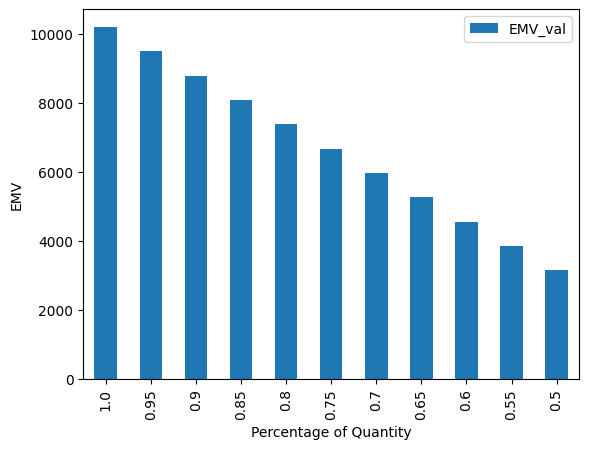

In [ ]:
EMV_com_table.plot(kind='bar', x="sens", y="EMV_val")
plt.xlabel('Percentage of Quantity')
plt.ylabel('EMV')
plt.show()

In [ ]:
EMV_com = []

In [ ]:
p = [5, 10, 15, 20, 25, 30, 35]
q_high = 3500
q_low = 1400

In [ ]:
for x in p:
    activity = ("A1", "A2", "A3", "A4", "A5", "A6")
    prob = (0.3, 0.7, 0.6, 0.4, 0.4, 0.6)
    valu = (-10000, 0, -5000, 0, q_high*x, q_low*x)

    var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
    var = var.set_index("activity")

    EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4 = EMV(var)

    EMV_com.append([x, EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4])

In [ ]:
EMV_com_table = pd.DataFrame(EMV_com, columns=["p", "EMV_val", "path1", "path2", "path3", "path4", "prob_path1", "prob_path2", "prob_path3", "prob_path4"])

In [ ]:
EMV_com_table

,p,EMV_val,path1,path2,path3,path4,prob_path1,prob_path2,prob_path3,prob_path4
0,5,-1884.0,2500,-8000,-10000,0,0.072,0.108,0.12,0.7
1,10,132.0,20000,-1000,-10000,0,0.072,0.108,0.12,0.7
2,15,2148.0,37500,6000,-10000,0,0.072,0.108,0.12,0.7
3,20,4164.0,55000,13000,-10000,0,0.072,0.108,0.12,0.7
4,25,6180.0,72500,20000,-10000,0,0.072,0.108,0.12,0.7
5,30,8196.0,90000,27000,-10000,0,0.072,0.108,0.12,0.7
6,35,10212.0,107500,34000,-10000,0,0.072,0.108,0.12,0.7


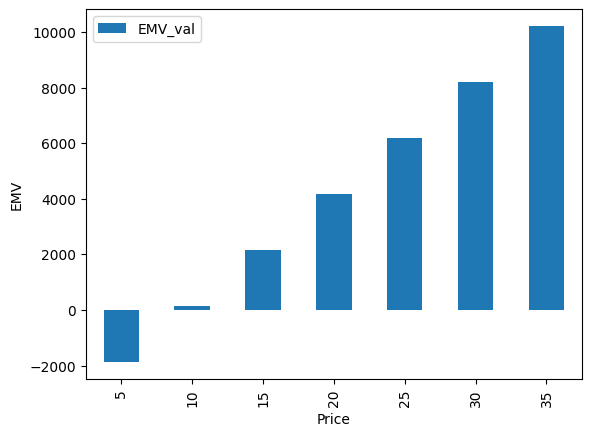

In [ ]:
EMV_com_table.plot(kind='bar', x="p", y="EMV_val")
plt.xlabel('Price')
plt.ylabel('EMV')
plt.show()

In [ ]:
EMV_com = []

In [ ]:
p = [10, 20, 30]
q_high = 3500
q_low = 1400
prob_pos = [0.1, 0.2, 0.3, 0.4]

In [ ]:
from itertools import product

In [ ]:
for x, y in list(product(p, prob_pos)):
    activity = ("A1", "A2", "A3", "A4", "A5", "A6")
    prob = (0.3, 0.7, 0.6, 0.4, y, 1-y)
    valu = (-10000, 0, -5000, 0, q_high*x, q_low*x)

    var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
    var = var.set_index("activity")

    EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4 = EMV(var)

    EMV_com.append([x, y, EMV_val, path1, path2, path3, path4, prob_path1, prob_path2, prob_path3, prob_path4])

In [ ]:
EMV_com_table = pd.DataFrame(EMV_com, columns=["p", "prob_pos", "EMV_val", "path1", "path2", "path3", "path4", "prob_path1", "prob_path2", "prob_path3", "prob_path4"])

In [ ]:
EMV_com_table

,p,prob_pos,EMV_val,path1,path2,path3,path4,prob_path1,prob_path2,prob_path3,prob_path4
0,10,0.1,-1002.0,20000,-1000,-10000,0,0.018,0.162,0.12,0.7
1,20,0.2,2652.0,55000,13000,-10000,0,0.036,0.144,0.12,0.7
2,30,0.3,7062.0,90000,27000,-10000,0,0.054,0.126,0.12,0.7
3,10,0.1,-1002.0,20000,-1000,-10000,0,0.018,0.162,0.12,0.7
4,10,0.2,-624.0,20000,-1000,-10000,0,0.036,0.144,0.12,0.7
5,10,0.3,-246.0,20000,-1000,-10000,0,0.054,0.126,0.12,0.7
6,10,0.4,132.0,20000,-1000,-10000,0,0.072,0.108,0.12,0.7
7,20,0.1,1896.0,55000,13000,-10000,0,0.018,0.162,0.12,0.7
8,20,0.2,2652.0,55000,13000,-10000,0,0.036,0.144,0.12,0.7
9,20,0.3,3408.0,55000,13000,-10000,0,0.054,0.126,0.12,0.7


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(EMV_com_table, x="prob_pos", y ="EMV_val", color="p")
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title="Positive Economy Prob", yaxis_title="EMV", legend_title="Price")
fig.show()

## Incomplete Information

In [ ]:
!pip install schemdraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
import schemdraw
from schemdraw import flow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with schemdraw.Drawing() as d:
  d.config(fontsize=11)
  d += (A0 := flow.Box(w=3.7, h=2).at((0,3)).label('New Product'))

  d += (A1 := flow.Box(w=3.7, h=2).at((5,6)).label('A1: Invest in R&D'))
  d += (A2 := flow.Box(w=3.7, h=2).at((5,0)).label('A2: Terminate'))

  d += (A7 := flow.Box(w=3.7, h=2).at((10,9)).label('A7: Hire Expert'))
  d += (A8 := flow.Box(w=3.7, h=2).at((10,3)).label('A8: Dont Hire Expert'))

  d += (A9 := flow.Box(w=3.7, h=2).at((15,18)).label('A9: Good Prediction'))
  d += (A10 := flow.Box(w=3.7, h=2).at((15,12)).label('A10: Bad Prediction'))

  d += (A11 := flow.Box(w=3.7, h=2).at((20,21)).label('A11: Marketing'))
  d += (A12 := flow.Box(w=3.7, h=2).at((20,15)).label('A12: Terminate'))
  d += (A13 := flow.Box(w=3.7, h=2).at((25,24)).label('A13: Positive Economy'))
  d += (A14 := flow.Box(w=3.7, h=2).at((25,18)).label('A14: Negative Economy'))

  d += (A15 := flow.Box(w=3.7, h=2).at((20,12)).label('A15: Marketing'))
  d += (A16 := flow.Box(w=3.7, h=2).at((20,9)).label('A16: Terminate'))
  d += (A17 := flow.Box(w=3.7, h=2).at((25,12)).label('A17: Positive Economy'))
  d += (A18 := flow.Box(w=3.7, h=2).at((25,6)).label('A18: Negative Economy'))

  d += (A3 := flow.Box(w=3.7, h=2).at((15,6)).label('A3: Marketing'))
  d += (A4 := flow.Box(w=3.7, h=2).at((15,0)).label('A4: Terminate'))
  d += (A5 := flow.Box(w=3.7, h=2).at((20,6)).label('A5: Positive Economy'))
  d += (A6 := flow.Box(w=3.7, h=2).at((20,3)).label('A6: Negative Economy'))

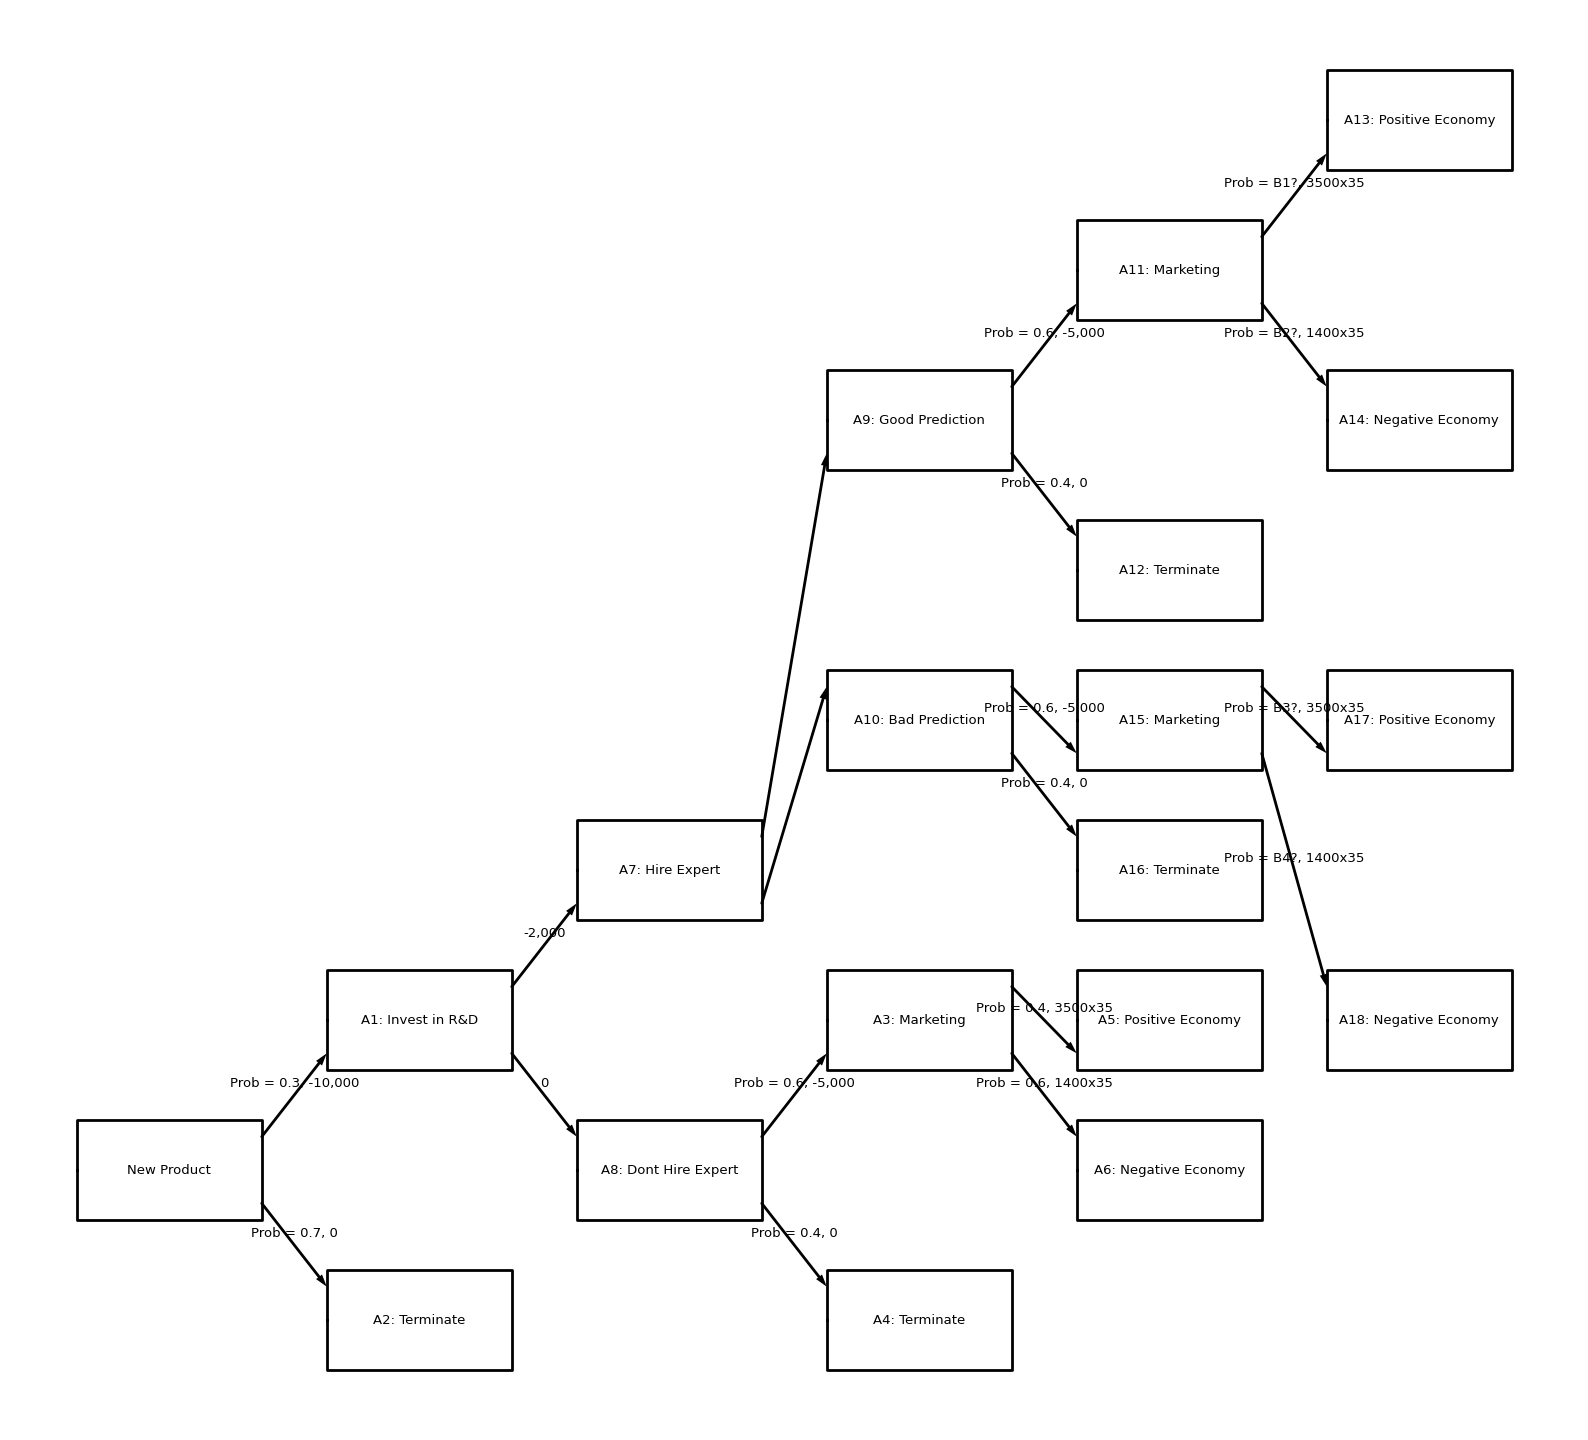

In [ ]:
with schemdraw.Drawing(file='/content/drive/MyDrive/BI BA Handbook/Chapter 10/tree.png') as d:
  d.config(fontsize=11)
  d += (A0 := flow.Box(w=3.7, h=2).at((0,3)).label('New Product'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ENE).to(A1.WSW).label('Prob = 0.3, -10,000')
  d += (A1 := flow.Box(w=3.7, h=2).at((5,6)).label('A1: Invest in R&D'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ESE).to(A2.WNW).label('Prob = 0.7, 0')
  d += (A2 := flow.Box(w=3.7, h=2).at((5,0)).label('A2: Terminate'))

  d += flow.Wire(arrow='->', k=.3).at(A1.ENE).to(A7.WSW).label('-2,000')
  d += (A7 := flow.Box(w=3.7, h=2).at((10,9)).label('A7: Hire Expert'))
  d += flow.Wire(arrow='->', k=.3).at(A1.ESE).to(A8.WNW).label('0')
  d += (A8 := flow.Box(w=3.7, h=2).at((10,3)).label('A8: Dont Hire Expert'))

  d += flow.Wire(arrow='->', k=.3).at(A7.ENE).to(A9.WSW)
  d += (A9 := flow.Box(w=3.7, h=2).at((15,18)).label('A9: Good Prediction'))
  d += flow.Wire(arrow='->', k=.3).at(A7.ESE).to(A10.WNW)
  d += (A10 := flow.Box(w=3.7, h=2).at((15,12)).label('A10: Bad Prediction'))

  d += flow.Wire(arrow='->', k=.3).at(A9.ENE).to(A11.WSW).label('Prob = 0.6, -5,000')
  d += (A11 := flow.Box(w=3.7, h=2).at((20,21)).label('A11: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A9.ESE).to(A12.WNW).label('Prob = 0.4, 0')
  d += (A12 := flow.Box(w=3.7, h=2).at((20,15)).label('A12: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A11.ENE).to(A13.WSW).label('Prob = B1?, 3500x35')
  d += (A13 := flow.Box(w=3.7, h=2).at((25,24)).label('A13: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A11.ESE).to(A14.WNW).label('Prob = B2?, 1400x35')
  d += (A14 := flow.Box(w=3.7, h=2).at((25,18)).label('A14: Negative Economy'))

  d += flow.Wire(arrow='->', k=.3).at(A10.ENE).to(A15.WSW).label('Prob = 0.6, -5,000')
  d += (A15 := flow.Box(w=3.7, h=2).at((20,12)).label('A15: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A10.ESE).to(A16.WNW).label('Prob = 0.4, 0')
  d += (A16 := flow.Box(w=3.7, h=2).at((20,9)).label('A16: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A15.ENE).to(A17.WSW).label('Prob = B3?, 3500x35')
  d += (A17 := flow.Box(w=3.7, h=2).at((25,12)).label('A17: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A15.ESE).to(A18.WNW).label('Prob = B4?, 1400x35')
  d += (A18 := flow.Box(w=3.7, h=2).at((25,6)).label('A18: Negative Economy'))

  d += flow.Wire(arrow='->', k=.3).at(A8.ENE).to(A3.WSW).label('Prob = 0.6, -5,000')
  d += (A3 := flow.Box(w=3.7, h=2).at((15,6)).label('A3: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A8.ESE).to(A4.WNW).label('Prob = 0.4, 0')
  d += (A4 := flow.Box(w=3.7, h=2).at((15,0)).label('A4: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A3.ENE).to(A5.WSW).label('Prob = 0.4, 3500x35')
  d += (A5 := flow.Box(w=3.7, h=2).at((20,6)).label('A5: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A3.ESE).to(A6.WNW).label('Prob = 0.6, 1400x35')
  d += (A6 := flow.Box(w=3.7, h=2).at((20,3)).label('A6: Negative Economy'))

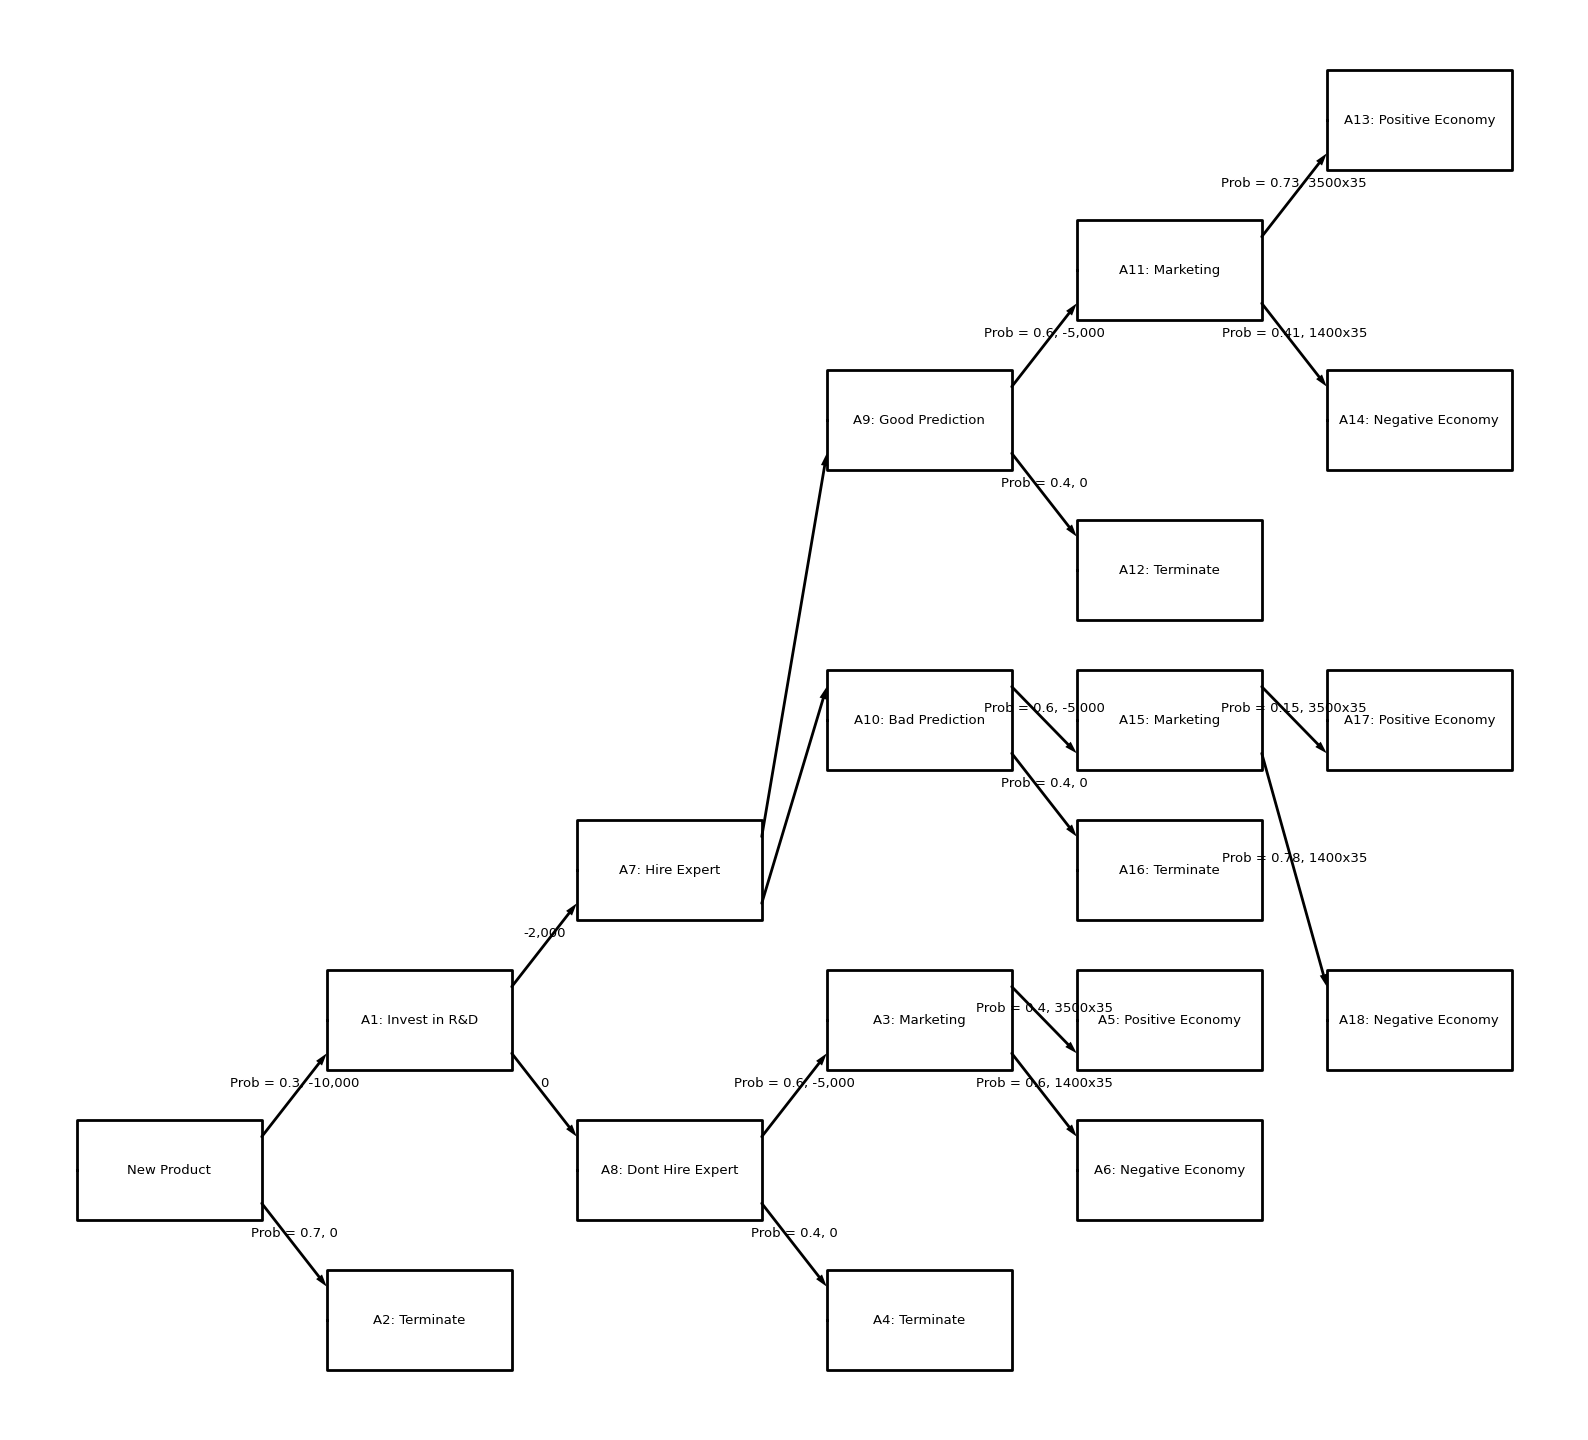

In [ ]:
with schemdraw.Drawing(file='/content/drive/MyDrive/BI BA Handbook/Chapter 10/treecomplete.png') as d:
  d.config(fontsize=11)
  d += (A0 := flow.Box(w=3.7, h=2).at((0,3)).label('New Product'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ENE).to(A1.WSW).label('Prob = 0.3, -10,000')
  d += (A1 := flow.Box(w=3.7, h=2).at((5,6)).label('A1: Invest in R&D'))
  d += flow.Wire(arrow='->', k=.3).at(A0.ESE).to(A2.WNW).label('Prob = 0.7, 0')
  d += (A2 := flow.Box(w=3.7, h=2).at((5,0)).label('A2: Terminate'))

  d += flow.Wire(arrow='->', k=.3).at(A1.ENE).to(A7.WSW).label('-2,000')
  d += (A7 := flow.Box(w=3.7, h=2).at((10,9)).label('A7: Hire Expert'))
  d += flow.Wire(arrow='->', k=.3).at(A1.ESE).to(A8.WNW).label('0')
  d += (A8 := flow.Box(w=3.7, h=2).at((10,3)).label('A8: Dont Hire Expert'))

  d += flow.Wire(arrow='->', k=.3).at(A7.ENE).to(A9.WSW)
  d += (A9 := flow.Box(w=3.7, h=2).at((15,18)).label('A9: Good Prediction'))
  d += flow.Wire(arrow='->', k=.3).at(A7.ESE).to(A10.WNW)
  d += (A10 := flow.Box(w=3.7, h=2).at((15,12)).label('A10: Bad Prediction'))

  d += flow.Wire(arrow='->', k=.3).at(A9.ENE).to(A11.WSW).label('Prob = 0.6, -5,000')
  d += (A11 := flow.Box(w=3.7, h=2).at((20,21)).label('A11: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A9.ESE).to(A12.WNW).label('Prob = 0.4, 0')
  d += (A12 := flow.Box(w=3.7, h=2).at((20,15)).label('A12: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A11.ENE).to(A13.WSW).label('Prob = 0.73, 3500x35')
  d += (A13 := flow.Box(w=3.7, h=2).at((25,24)).label('A13: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A11.ESE).to(A14.WNW).label('Prob = 0.41, 1400x35')
  d += (A14 := flow.Box(w=3.7, h=2).at((25,18)).label('A14: Negative Economy'))

  d += flow.Wire(arrow='->', k=.3).at(A10.ENE).to(A15.WSW).label('Prob = 0.6, -5,000')
  d += (A15 := flow.Box(w=3.7, h=2).at((20,12)).label('A15: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A10.ESE).to(A16.WNW).label('Prob = 0.4, 0')
  d += (A16 := flow.Box(w=3.7, h=2).at((20,9)).label('A16: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A15.ENE).to(A17.WSW).label('Prob = 0.15, 3500x35')
  d += (A17 := flow.Box(w=3.7, h=2).at((25,12)).label('A17: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A15.ESE).to(A18.WNW).label('Prob = 0.78, 1400x35')
  d += (A18 := flow.Box(w=3.7, h=2).at((25,6)).label('A18: Negative Economy'))

  d += flow.Wire(arrow='->', k=.3).at(A8.ENE).to(A3.WSW).label('Prob = 0.6, -5,000')
  d += (A3 := flow.Box(w=3.7, h=2).at((15,6)).label('A3: Marketing'))
  d += flow.Wire(arrow='->', k=.3).at(A8.ESE).to(A4.WNW).label('Prob = 0.4, 0')
  d += (A4 := flow.Box(w=3.7, h=2).at((15,0)).label('A4: Terminate'))
  d += flow.Wire(arrow='->', k=.3).at(A3.ENE).to(A5.WSW).label('Prob = 0.4, 3500x35')
  d += (A5 := flow.Box(w=3.7, h=2).at((20,6)).label('A5: Positive Economy'))
  d += flow.Wire(arrow='->', k=.3).at(A3.ESE).to(A6.WNW).label('Prob = 0.6, 1400x35')
  d += (A6 := flow.Box(w=3.7, h=2).at((20,3)).label('A6: Negative Economy'))

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
p=35
q_high = 3500
q_low = 1400

In [ ]:
predict = ("act_good", "act_bad")
g = (0.8, 0.3)
b = (0.2, 0.7)

In [ ]:
cond_var = pd.DataFrame(list(zip(predict, g, b)), columns=["predict", "pred_good", "pred_bad"])
var = cond_var.set_index("predict")

In [ ]:
var

,pred_good,pred_bad
predict,,
act_good,0.8,0.2
act_bad,0.3,0.7


In [ ]:
uninform = (0.4, 0.6)

In [ ]:
prior = ((uninform[0] * var.loc["act_good", 'pred_good']) + (uninform[0] * var.loc["act_bad", 'pred_good']), (uninform[1] * var.loc["act_good", 'pred_bad']) + (uninform[1] * var.loc["act_bad", 'pred_bad']))

In [ ]:
prior

(0.44000000000000006, 0.54)

In [ ]:
b1 = uninform[0] * var.loc["act_good", "pred_good"] / prior[0]
b2 = uninform[1] * var.loc["act_bad", "pred_good"] / prior[0]
b3 = uninform[0] * var.loc["act_good", "pred_bad"] / prior[1]
b4 = uninform[1] * var.loc["act_bad", "pred_bad"] / prior[1]

In [ ]:
b1, b2, b3, b4

(0.7272727272727273,
 0.409090909090909,
 0.14814814814814817,
 0.7777777777777777)

In [ ]:
activity = ("A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18")
prob = (0.3, 0.7, 0.6, 0.4, 0.4, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.4, b1, b2, 0.6, 0.4, b3, b4)
valu = (-10000, 0, -5000, 0, q_high*p, q_low*p, -2000, 0, 0, 0, -5000, 0, q_high*p, q_low*p, -5000, 0, q_high*p, q_low*p)

In [ ]:
var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
var = var.set_index("activity")

In [ ]:
var

,prob,valu
activity,,
A1,0.300000,-10000
A2,0.700000,0
A3,0.600000,-5000
A4,0.400000,0
A5,0.400000,122500
A6,0.600000,49000
A7,0.500000,-2000
A8,0.500000,0
A9,0.500000,0


In [ ]:
def EMV(var_table):
    path1 = var.loc["A1", 'valu'] + var.loc["A8", 'valu'] + var.loc["A3", 'valu'] + var.loc["A5", 'valu']
    path2 = var.loc["A1", 'valu'] + var.loc["A8", 'valu'] + var.loc["A3", 'valu'] + var.loc["A6", 'valu']
    path3 = var.loc["A1", 'valu'] + var.loc["A8", 'valu'] + var.loc["A4", 'valu']

    path4 = var.loc["A2", 'valu']

    path5 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A9", 'valu'] + var.loc["A11", 'valu'] + var.loc["A13", 'valu']
    path6 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A9", 'valu'] + var.loc["A11", 'valu'] + var.loc["A14", 'valu']
    path7 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A9", 'valu'] + var.loc["A12", 'valu']

    path8 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A10", 'valu'] + var.loc["A15", 'valu'] + var.loc["A17", 'valu']
    path9 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A10", 'valu'] + var.loc["A15", 'valu'] + var.loc["A18", 'valu']
    path10 = var.loc["A1", 'valu'] + var.loc["A7", 'valu'] + var.loc["A10", 'valu'] + var.loc["A16", 'valu']

    prob_path1 = var.loc["A1", 'prob'] * var.loc["A8", 'prob'] * var.loc["A3", 'prob'] * var.loc["A5", 'prob']
    prob_path2 = var.loc["A1", 'prob'] * var.loc["A8", 'prob'] * var.loc["A3", 'prob'] * var.loc["A6", 'prob']
    prob_path3 = var.loc["A1", 'prob'] * var.loc["A8", 'prob'] * var.loc["A4", 'prob']

    prob_path4 = var.loc["A2", 'prob']

    prob_path5 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A9", 'prob'] * var.loc["A11", 'prob'] * var.loc["A13", 'prob']
    prob_path6 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A9", 'prob'] * var.loc["A11", 'prob'] * var.loc["A14", 'prob']
    prob_path7 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A9", 'prob'] * var.loc["A12", 'prob']

    prob_path8 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A10", 'prob'] * var.loc["A15", 'prob'] * var.loc["A17", 'prob']
    prob_path9 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A10", 'prob'] * var.loc["A15", 'prob'] * var.loc["A18", 'prob']
    prob_path10 = var.loc["A1", 'prob'] * var.loc["A7", 'prob'] * var.loc["A10", 'prob'] * var.loc["A16", 'prob']

    EMV_val = sum(np.multiply([path1, path2, path3, path4, path5, path6, path7, path8, path9, path10],
     [prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10 ]))

    return EMV_val, path1, path2, path3, path4, path5, path6, path7, path8, path9, path10, prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10


In [ ]:
EMV_val, path1, path2, path3, path4, path5, path6, path7, path8, path9, path10, prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10 = EMV(var)

In [ ]:
EMV_com = [EMV_val, path1, path2, path3, path4, path5, path6, path7, path8, path9, path10, prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10]


In [ ]:
EMV_com

[10251.151515151514,
 107500,
 34000,
 -10000,
 0,
 105500,
 32000,
 -12000,
 105500,
 32000,
 -12000,
 0.036,
 0.054,
 0.06,
 0.7,
 0.03272727272727273,
 0.018409090909090906,
 0.03,
 0.006666666666666666,
 0.035,
 0.03]

## Sensitivity Analysis on Incomplete Info

In [ ]:
EMV_com = []

In [ ]:
p=35
q_high = 3500
q_low = 1400

In [ ]:
uninform = (0.4, 0.6)

In [ ]:
agg = (0.5, 0.6, 0.7, 0.8)
abb = (0.5, 0.6, 0.7, 0.8)

In [ ]:
for x, y in list(product(agg, abb)):
    predict = ("act_good", "act_bad")
    g = (x, 1-y)
    b = (1-x, y)

    cond_var = pd.DataFrame(list(zip(predict, g, b)), columns=["predict", "pred_good", "pred_bad"])
    var = cond_var.set_index("predict")

    prior = ((uninform[0] * var.loc["act_good", 'pred_good']) + (uninform[0] * var.loc["act_bad", 'pred_good']), (uninform[1] * var.loc["act_good", 'pred_bad']) + (uninform[1] * var.loc["act_bad", 'pred_bad']))

    b1 = uninform[0] * var.loc["act_good", "pred_good"] / prior[0]
    b2 = uninform[1] * var.loc["act_bad", "pred_good"] / prior[0]
    b3 = uninform[0] * var.loc["act_good", "pred_bad"] / prior[1]
    b4 = uninform[1] * var.loc["act_bad", "pred_bad"] / prior[1]

    activity = ("A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18")
    prob = (0.3, 0.7, 0.6, 0.4, 0.4, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.4, b1, b2, 0.6, 0.4, b3, b4)
    valu = (-10000, 0, -5000, 0, q_high*p, q_low*p, -2000, 0, 0, 0, -5000, 0, q_high*p, q_low*p, -5000, 0, q_high*p, q_low*p)

    var = pd.DataFrame(list(zip(activity, prob, valu)), columns=["activity", "prob", "valu"])
    var = var.set_index("activity")

    EMV_val, path1, path2, path3, path4, path5, path6, path7, path8, path9, path10, prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10 = EMV(var)

    EMV_com.append([x, y, EMV_val, path1, path2, path3, path4, path5, path6, path7, path8, path9, path10, prob_path1, prob_path2, prob_path3, prob_path4, prob_path5, prob_path6, prob_path7, prob_path8, prob_path9, prob_path10])

In [ ]:
EMV_com_table = pd.DataFrame(EMV_com, columns=["agg", "abb", "EMV_val", "path1", "path2", "path3", "path4", "path5", "path6", "path7", "path8", "path9", "path10", "prob_path1", "prob_path2", "prob_path3", "prob_path4", "prob_path5", "prob_path6", "prob_path7", "prob_path8", "prob_path9", "prob_path10"])

In [ ]:
EMV_com_table.sort_values("EMV_val", ascending=False)

,agg,abb,EMV_val,path1,path2,path3,path4,path5,path6,path7,...,prob_path1,prob_path2,prob_path3,prob_path4,prob_path5,prob_path6,prob_path7,prob_path8,prob_path9,prob_path10
7,0.6,0.8,10501.625000,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.033750,0.016875,0.03,0.010000,0.030000,0.03
3,0.5,0.8,10497.675824,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.032143,0.019286,0.03,0.011538,0.027692,0.03
11,0.7,0.8,10468.954545,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.035000,0.015000,0.03,0.008182,0.032727,0.03
15,0.8,0.8,10401.000000,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.036000,0.013500,0.03,0.006000,0.036000,0.03
6,0.6,0.7,10338.272727,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.030000,0.022500,0.03,0.010909,0.028636,0.03
2,0.5,0.7,10321.937500,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.028125,0.025312,0.03,0.012500,0.026250,0.03
10,0.7,0.7,10314.750000,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.031500,0.020250,0.03,0.009000,0.031500,0.03
14,0.8,0.7,10251.151515,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.032727,0.018409,0.03,0.006667,0.035000,0.03
5,0.6,0.6,10228.500000,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.027000,0.027000,0.03,0.012000,0.027000,0.03
1,0.5,0.6,10207.590909,107500,34000,-10000,0,105500,32000,-12000,...,0.036,0.054,0.06,0.7,0.025000,0.030000,0.03,0.013636,0.024545,0.03


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(EMV_com_table, x="agg", y ="EMV_val", color="abb")
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title="Predicted Good When Actually Good", yaxis_title="EMV", legend_title="Predicted Bad When Actually Bad")
fig.add_hline(y = 10212)
fig.show()